In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Метод наискорейшего градиентного спуска

## Функции

In [2]:
def f(x1,x2):
    return 4*x1**2 - 20*x1 + x2**2 - 28*x2 + 222

def f2(x):
    return 4*x[0]**2 - 20*x[0] + x[1]**2 - 28*x[1] + 222


def grad(x1,x2):
    return [8*x1-20,2*x2 - 28]

def f_next(x,a,p):
    x_next = [x[0] + a*p[0],x[1] + a*p[1] ]
    return f(x_next[0],x_next[1])

def sliding_win(x, p):
    a = 0
    h = 0.05
    while(True):
        if (f_next(x,a-h,p) > f_next(x,a,p) and f_next(x,a,p) < f_next(x,a+h,p)):
            break
        if (f_next(x,a-h,p) > f_next(x, a+h, p)):
            a += h/2
        elif (a > -h/2):
            a -= h/2 
    return a

def evkl_norma(x):
    s = 0
    for i in range(len(x)):
        s += x[i]**2
    temp = s**0.5
    return temp

def dih_help(x1,x2,alpha):
    return f(x1 - alpha * grad(x1,x2)[0], x2 - alpha * grad(x1,x2)[1])

def dihotomia(a,b,pogr,x1,x2):
    k = 1
    ak = a
    bk = b
    delta = 0.5*pogr

    while((bk-ak >= pogr)):
        lk = (ak + bk - delta)/2
        mk = (ak + bk + delta)/2
        k += 1
        if (dih_help(x1,x2,lk) <= dih_help(x1,x2,mk)): bk = mk
        else: ak = lk
    
        min = (ak + bk)/2

    return min

def grad_descent(a,b,pogr):
    global x1_way 
    global x2_way 
    
    x1 = [None]*3
    x2 = [None]*3
    alpha = [None]*3
    x = [None]*3
    p = [None]*3
    
    x1[0] = a
    x2[0] = b
    x1_way = [x1[0]]
    x2_way = [x2[0]]
    f_way = [f(x1[0],x2[0])]
    
    gh = 0
    k = 0
    while(True):
       
        x[k] = x1[0]
        x[k+1] = x2[0]
        p[k] = - grad(x1[0],x2[0])[0]
        p[k+1] = - grad(x1[0],x2[0])[0]
        u = sliding_win(x,p)
        gh += 1

        alpha[k] = dihotomia(u - 0.025, u + 0.025, pogr, x1[k], x2[k])
        x1[k+1] = x1[k] - alpha[k] * grad(x1[k],x2[k])[0]
        x2[k+1] = x2[k] - alpha[k] * grad(x1[k],x2[k])[1]

        x1_way += [x1[k+1]]
        x2_way += [x2[k+1]]
        f_way += [f(x1[k+1],x2[k+1])]

        if (evkl_norma([x1[k+1] - x1[k], x2[k+1] - x2[k]]) <= pogr):
            break
        if ( (x1[k+1] - x1[k] <= pogr) and (x2[k+1] - x2[k] <= pogr) ):
            break
        
        x1[k] = x1[k+1]
        x2[k] = x2[k+1]
        k = 1
    print('Количество итерраций: ', gh)
    return (f(x1[k+1], x2[k+1]), x1[k+1], x2[k+1])

## Поиск минимума

In [3]:
x1_start = -1
x2_start = -13
pogr = 0.001
f_min, x1_ex,x2_ex  = grad_descent(x1_start,x2_start,pogr)
print('Минимум фукции: ', f_min)
print('Коордиаты минимума: ',x1_ex, x2_ex)

Количество итерраций:  69
Минимум фукции:  1.000080152291929
Коордиаты минимума:  2.5000000000000058 13.991047218758133


## Избражение поиска

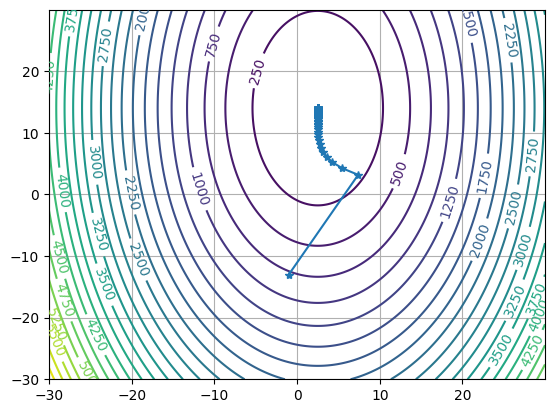

In [4]:
step = 0.025
x1 = np.arange(-30.0, 30.0, step)
x2 = np.arange(-30.0, 30.0, step)
X, Y = np.meshgrid(x1, x2)
Z = 4*X**2 - 20*X + Y**2 - 28*Y + 222
CS = plt.contour(X,Y, Z, 25)

plt.grid()
plt.clabel(CS, inline=1, fontsize=10)
plt.plot(x1_way,x2_way,marker='*')

# Метод Хука-Дживса

## Функции

In [5]:
def hooke_jeeves(a,b,h):
    global x1_way
    global x2_way
    global count
    
    if f(a+h,b)<f(a,b):
        count += 1
        x2_way += [b]
        x1_way += [a+h]
        return hooke_jeeves(a+h,b,h)
    elif f(a-h,b)<f(a,b):
        count += 1
        x2_way += [b]
        x1_way += [a-h]
        return hooke_jeeves(a-h,b,h)
    elif f(a,b+h)<f(a,b):
        count += 1
        x1_way += [a]
        x2_way += [b+h]
        return hooke_jeeves(a,b+h,h)
    elif f(a,b-h)<f(a,b):
        count += 1
        x1_way += [a]
        x2_way += [b-h]
        return hooke_jeeves(a,b-h,h)
    else:
        count += 1
        x1_way += [a]
        x2_way += [b]
        print('Кол-во итерраций: ',count)
        return (a,b)



def first_search(a,b,h):
    global x1_way
    global x2_way
    global count
    temp = 0
    
    if f(a+h,b)<f(a,b):
        count += 1
        x2_way += [b]
        x1_way += [a+h]
        #point = [a+h,b]
        temp = f(a+h,b)
        if f(a+h,b+h)<temp:
            count += 1
            x1_way += [a+h]
            x2_way += [b+h]
            ##point = [a+h,b+h]
            return first_search(a+h,b+h,h)
        elif f(a+h,b-h)<temp:
            count += 1
            x1_way += [a+h]
            x2_way += [b-h]
            #point = [a+h,b-h]
            return first_search(a+h,b-h,h)
        else: return first_search(a+h,b,h)
    elif f(a-h,b)<f(a,b):
        count += 1
        x2_way += [b]
        x1_way += [a-h]
        #point = [a-h,b]
        temp = f(a-h,b)
        if f(a-h,b+h)<temp:
            count += 1
            x1_way += [a-h]
            x2_way += [b+h]
            #point = [a-h,b+h]
            return first_search(a-h,b+h,h)
        elif f(a-h,b-h)<temp:
            count += 1
            x1_way += [a-h]
            x2_way += [b-h]
            #point = [a-h,b-h]
            return first_search(a-h,b-h,h) 
        else: return first_search(a-h,b,h)
    else: return [a,b]
    

def second_search(point1,point2,h):
    n = len(point1)
    point3 = []
    point3 += [point1[i] + 2*(point2[i] - point1[i]) for i in range(n)]

    point4 = first_search(point3[0], point3[1], h)     
    if  point4 != point3:
        return second_search(point2, point4,h)
    else : 
        return first_search(point2[0],point2[1],h)

## Поиск минимума

[2.4999999999999916, -9.500000000000075]
Минимум фукции:  273.2500000000074
Коордиаты минимума:  2.5000000000000577 -2.500000000000224
[-1, -0.99, -0.99, -0.98, -0.98, -0.97, -0.97, -0.96, -0.96, -0.95, -0.95, -0.94, -0.94, -0.9299999999999999, -0.9299999999999999, -0.9199999999999999, -0.9199999999999999, -0.9099999999999999, -0.9099999999999999, -0.8999999999999999, -0.8999999999999999, -0.8899999999999999, -0.8899999999999999, -0.8799999999999999, -0.8799999999999999, -0.8699999999999999, -0.8699999999999999, -0.8599999999999999, -0.8599999999999999, -0.8499999999999999, -0.8499999999999999, -0.8399999999999999, -0.8399999999999999, -0.8299999999999998, -0.8299999999999998, -0.8199999999999998, -0.8199999999999998, -0.8099999999999998, -0.8099999999999998, -0.7999999999999998, -0.7999999999999998, -0.7899999999999998, -0.7899999999999998, -0.7799999999999998, -0.7799999999999998, -0.7699999999999998, -0.7699999999999998, -0.7599999999999998, -0.7599999999999998, -0.7499999999999998,

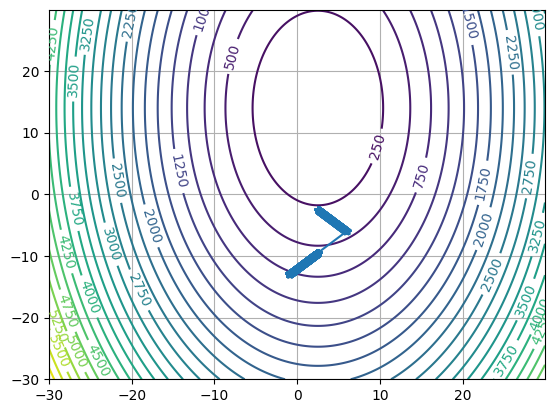

In [6]:
x1_way.clear()
x2_way.clear()
x1_start = -1
x2_start = -13
x1_way += [x1_start]
x2_way += [x2_start]
count = 0
h = 0.01

point1 = [x1_start, x2_start]
point2 = [first_search(x1_start, x2_start,h)[0],first_search(x1_start, x2_start,h)[1]]
print(point2)

x1_ex, x2_ex  = second_search(point1,point2,h)

print('Минимум фукции: ', f(x1_ex,x2_ex))
print('Коордиаты минимума: ',x1_ex, x2_ex)

print(x1_way,'\n', x2_way)

step = 0.05
x1 = np.arange(-30.0, 30.0, step)
x2 = np.arange(-30.0, 30.0, step)
X, Y = np.meshgrid(x1, x2)
Z = 4*X**2 - 20*X + Y**2 - 28*Y + 222
CS = plt.contour(X,Y, Z, 25)

plt.grid()
plt.clabel(CS, inline=1, fontsize=10)
plt.plot(x1_way,x2_way, marker = '*')

In [7]:
x1_way.clear()
x2_way.clear()
x1_start = -1
x2_start = -13
count = 0
h = 0.1
x1_ex, x2_ex  = hooke_jeeves(x1_start,x2_start,h) #рекурсивная функция

print('Минимум фукции: ', f(x1_ex, x2_ex))
print('Коордиаты минимума: ',x1_ex, x2_ex)

Кол-во итерраций:  306
Минимум фукции:  1.0000000000000284
Коордиаты минимума:  2.500000000000001 13.999999999999938


## Изображение поиска

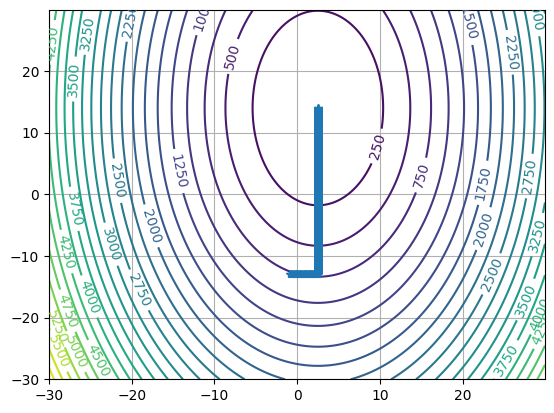

In [8]:
step = 0.05
x1 = np.arange(-30.0, 30.0, step)
x2 = np.arange(-30.0, 30.0, step)
X, Y = np.meshgrid(x1, x2)
Z = 4*X**2 - 20*X + Y**2 - 28*Y + 222
CS = plt.contour(X,Y, Z, 25)

plt.grid()
plt.clabel(CS, inline=1, fontsize=10)
plt.plot(x1_way,x2_way, marker = '*')